In [316]:
library("tsDyn")

### Lista Prática 5 - Pablo Corrêa Fonseca

**Importe para o R os dados do arquivo “dados_03.csv” e converta as variáveis YIG, YIGD, IBCBR, IBCBRD, IPCA e TJ para séries de tempo usando o comando “ts”. [Obs.: YIG = produção física industrial; YIGD = produção física industrial dessazonalizada; IPCA = índice do IPCA; TJ = taxa Selic; IBCBR = índice de atividade do BCB].**

In [317]:
data = read.table(file="dados03.csv",sep=";", dec=',', row.names=1,header=TRUE)
TJ = ts(data[,1], start=c(2003,01), frequency=12)
IPCA = ts(data[,2], start=c(2003,01), frequency=12)
IBCBR = ts(data[,3], start=c(2003,01), frequency=12)
IBCBRD = ts(data[,4], start=c(2003,01), frequency=12)
YIG = ts(data[,5], start=c(2003,01), frequency=12)
YIGD = ts(data[,6], start=c(2003,01), frequency=12)

**A partir destes dados, estime modelos AR, SETAR e TAR para a inflação (primeira diferença logarítmica de IPCA). Para o modelos SETAR, teste o modelo linear contra modelos com um e dois regimes; em seguida, estime o modelo com dois regimes. Para os modelos TAR, use como variável limiar, sucessivamente: taxa de crescimento do IBCBRD no mês; taxa de crescimento do IBCBRD acumulada em 12 meses; TJ. Compare os parâmetros estimados sob todos os modelos e comente sobre as diferenças e semelhanças. Quais variáveis limiares parecem afetar mais fortemente estes parâmetros?**

In [318]:
#define variavel a ser analisada
x=diff(log(IPCA))

# testa 1 regime contra 2 ou 3
# modelo AR(1) (m=1) 
# thDelay indica defasagem da variavel threshold
setarTest(x, m=1, thDelay = 0, nboot=100, trim=0.1,test="1vs")

Warning message:
"Possible unit root in the medium  regime. Roots are: 0.998"

Test of linearity against setar(2) and setar(3)

         Test Pval
1vs2  3.88206 0.79
1vs3 10.67652 0.63


Non linear autoregressive model

SETAR model ( 2 regimes)
Coefficients:
Low regime:
    const.L      phiL.1 
0.002251107 0.396550847 

High regime:
    const.H      phiH.1 
0.001890307 0.627762994 

Threshold:
-Variable: Z(t) = + (1) X(t)
-Value: 0.004888
Proportion of points in low regime: 55.17% 	 High regime: 44.83% 

Residuals:
        Min          1Q      Median          3Q         Max 
-7.2107e-03 -1.2626e-03  3.0604e-05  1.3662e-03  5.5556e-03 

Fit:
residuals variance = 4.21e-06,  AIC = -2156, MAPE = 99.26%

Coefficient(s):

          Estimate  Std. Error  t value  Pr(>|t|)    
const.L 0.00225111  0.00044235   5.0890 9.409e-07 ***
phiL.1  0.39655085  0.13556663   2.9251   0.00391 ** 
const.H 0.00189031  0.00083586   2.2615   0.02499 *  
phiH.1  0.62776299  0.11022262   5.6954 5.265e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold
Variable: Z(t) = + (1) X(t) 

Value: 0.004888

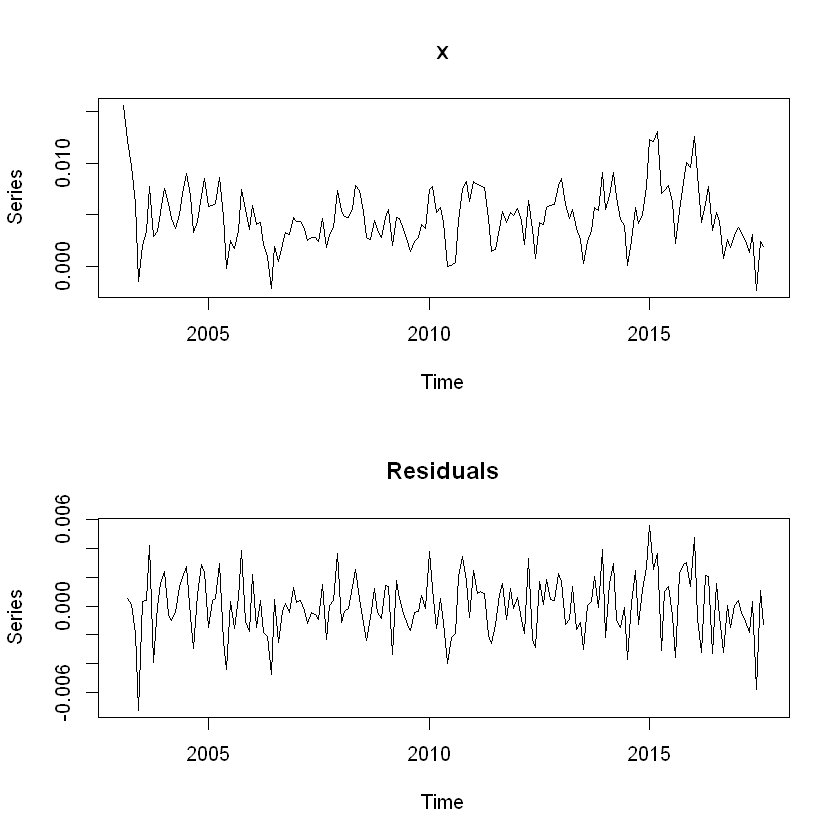

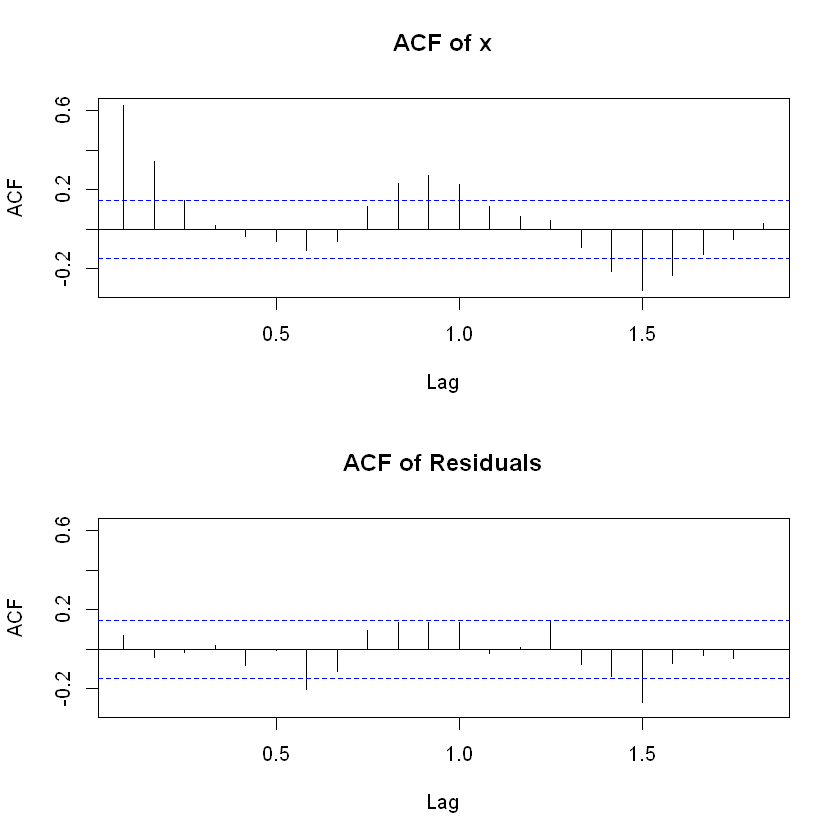

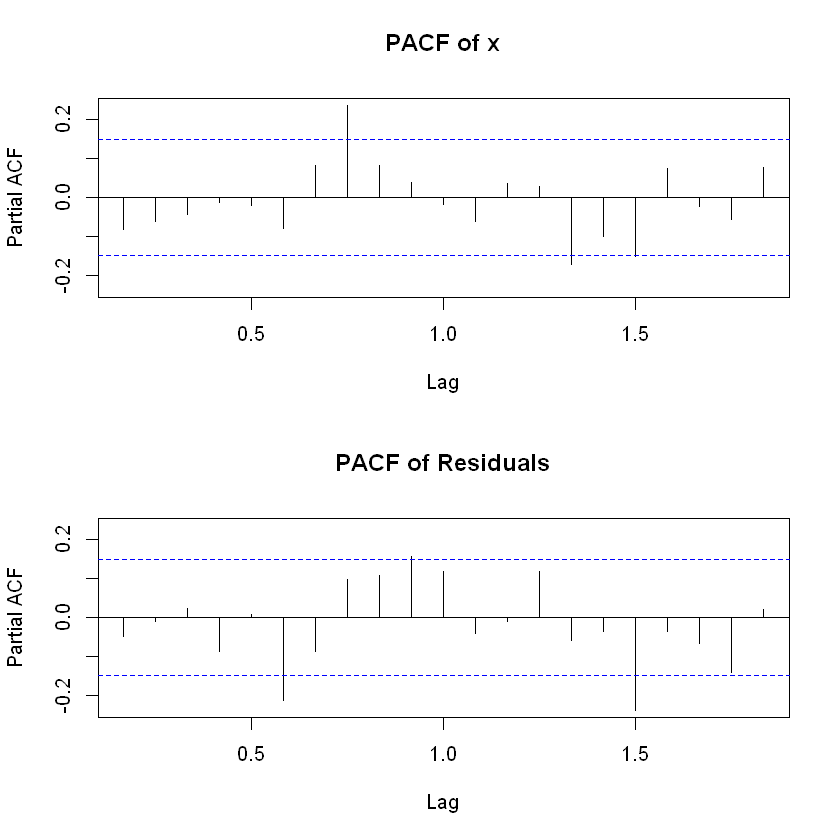

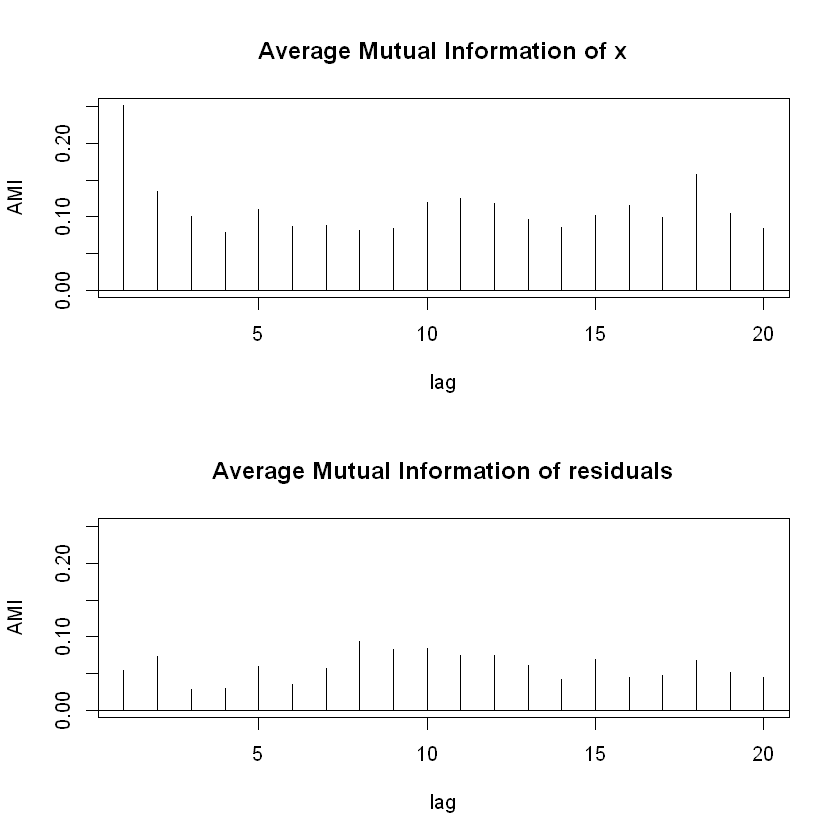

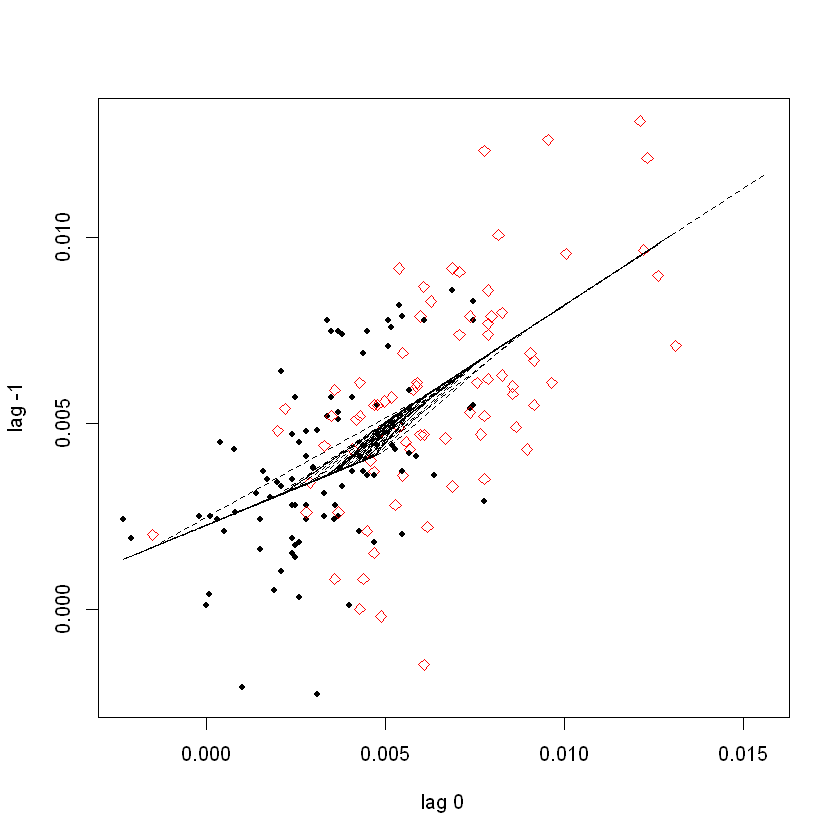

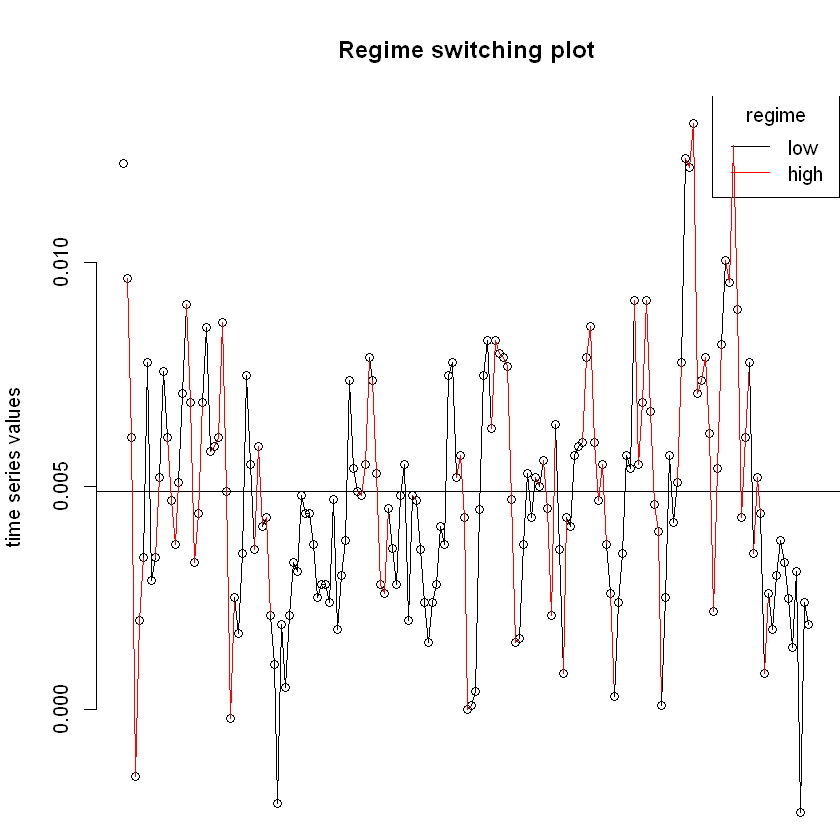

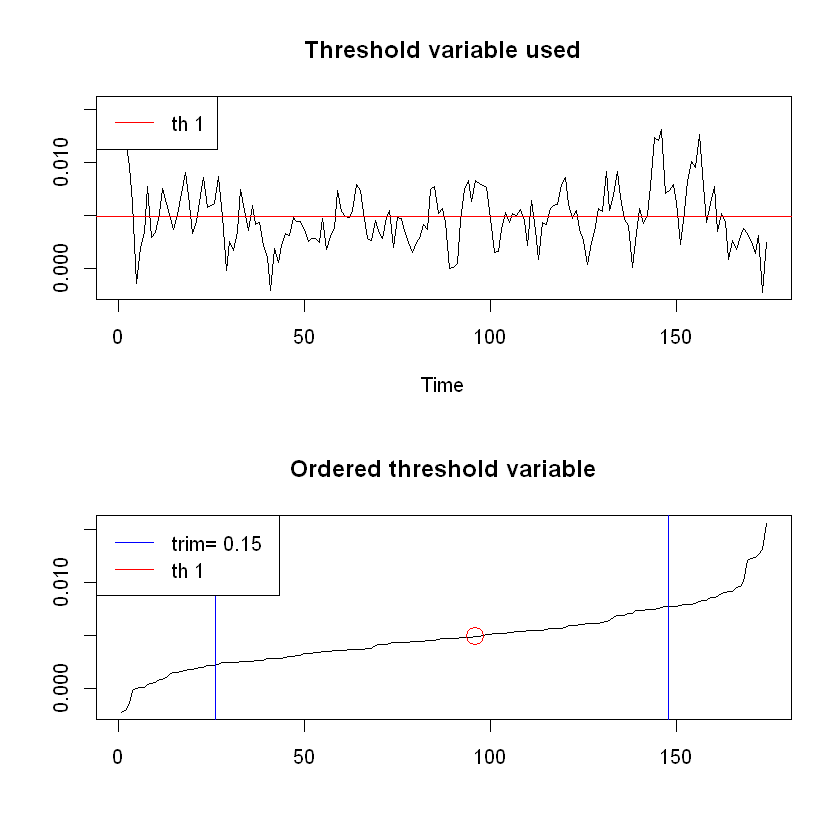

In [319]:
#estima modelo AR(1) (m=1) com 2 regimes (nthresh=1)
model = setar(x, m=1, thDelay=0, include = "const", model="TAR", nthresh=1, trim=0.15)
summary(model)
plot(model)


Non linear autoregressive model

SETAR model ( 2 regimes)
Coefficients:
Low regime:
     const.L       phiL.1 
0.0002500134 0.7974935580 

High regime:
    const.H      phiH.1 
0.001976032 0.599252933 

Threshold:
-Variable: external-Value: 0.996
Proportion of points in low regime: 19.54% 	 High regime: 80.46% 

Residuals:
        Min          1Q      Median          3Q         Max 
-6.6027e-03 -1.2698e-03 -7.8686e-05  1.3087e-03  5.6914e-03 

Fit:
residuals variance = 4.188e-06,  AIC = -2157, MAPE = 94.99%

Coefficient(s):

          Estimate  Std. Error  t value  Pr(>|t|)    
const.L 0.00025001  0.00076242   0.3279    0.7434    
phiL.1  0.79749356  0.11705716   6.8129 1.564e-10 ***
const.H 0.00197603  0.00033971   5.8168 2.884e-08 ***
phiH.1  0.59925293  0.06304151   9.5057 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold
Variable: external
Value: 0.996

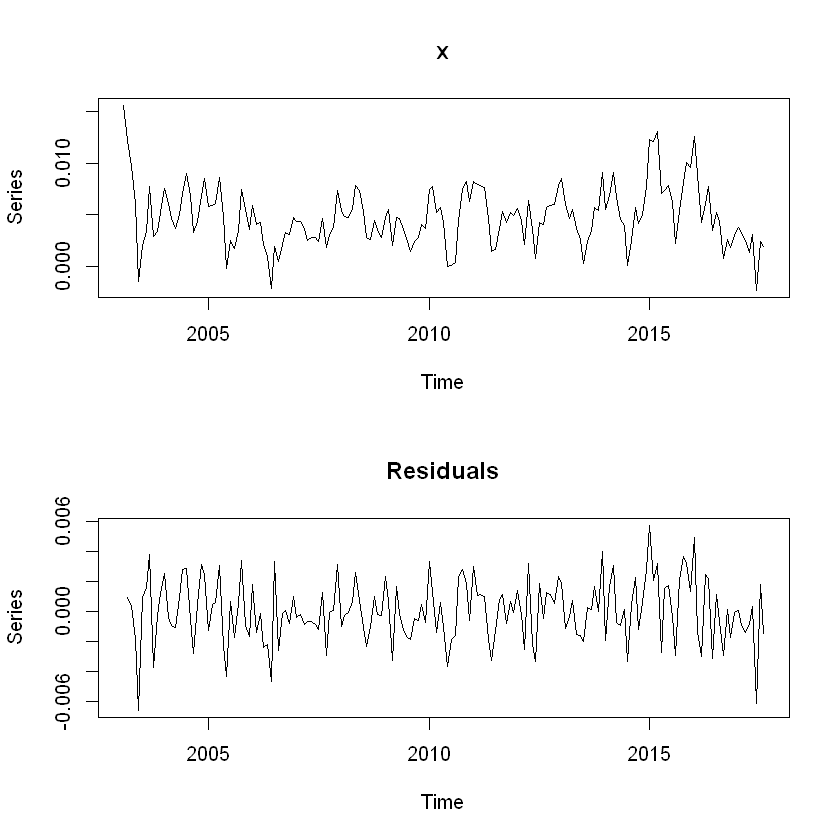

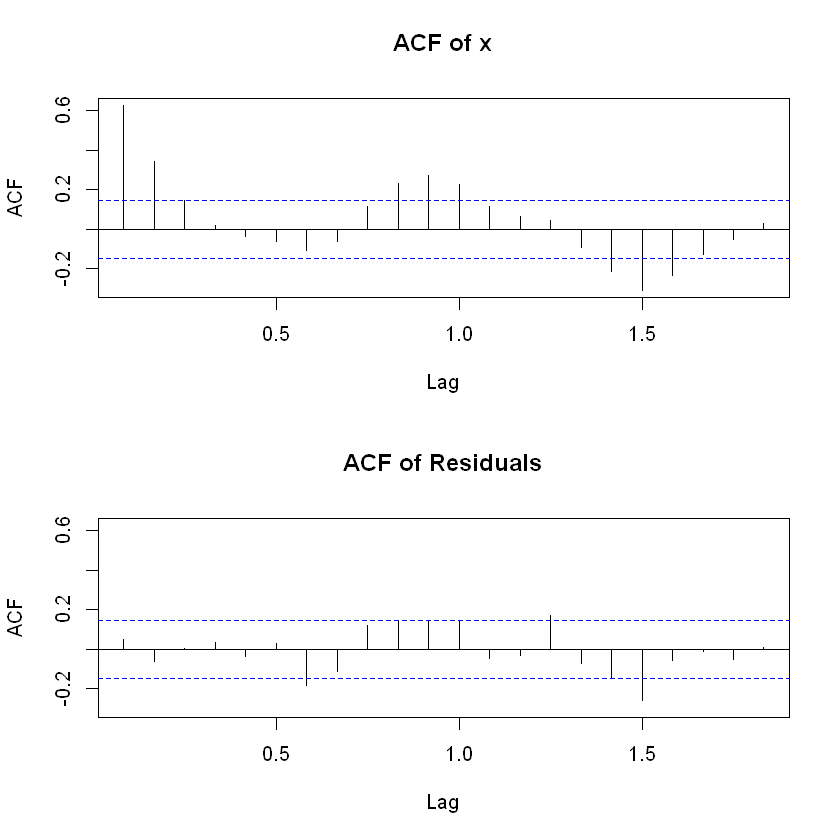

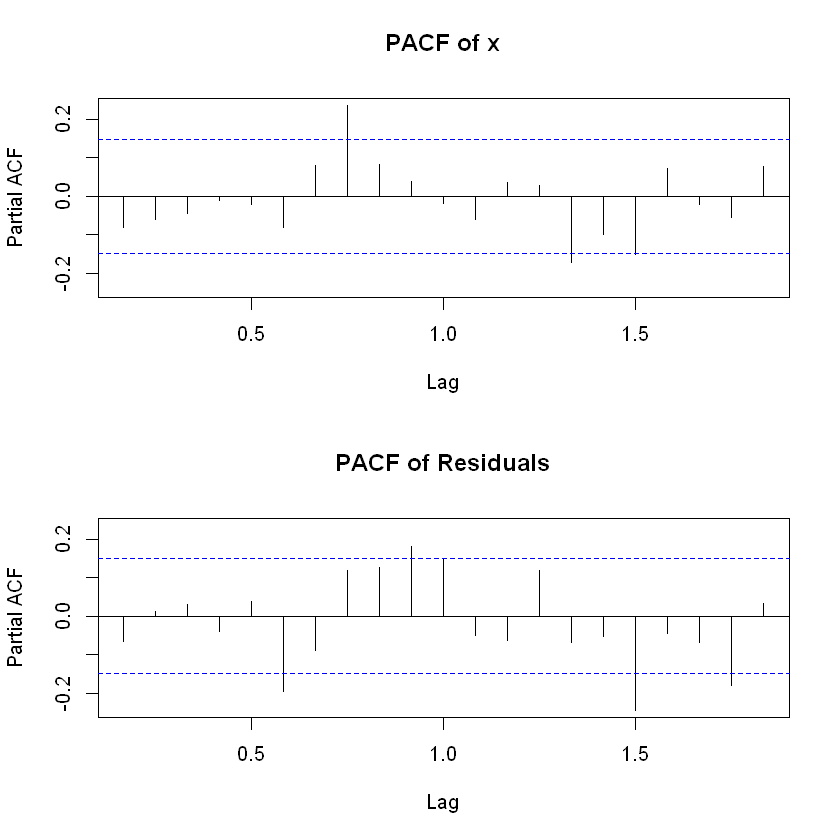

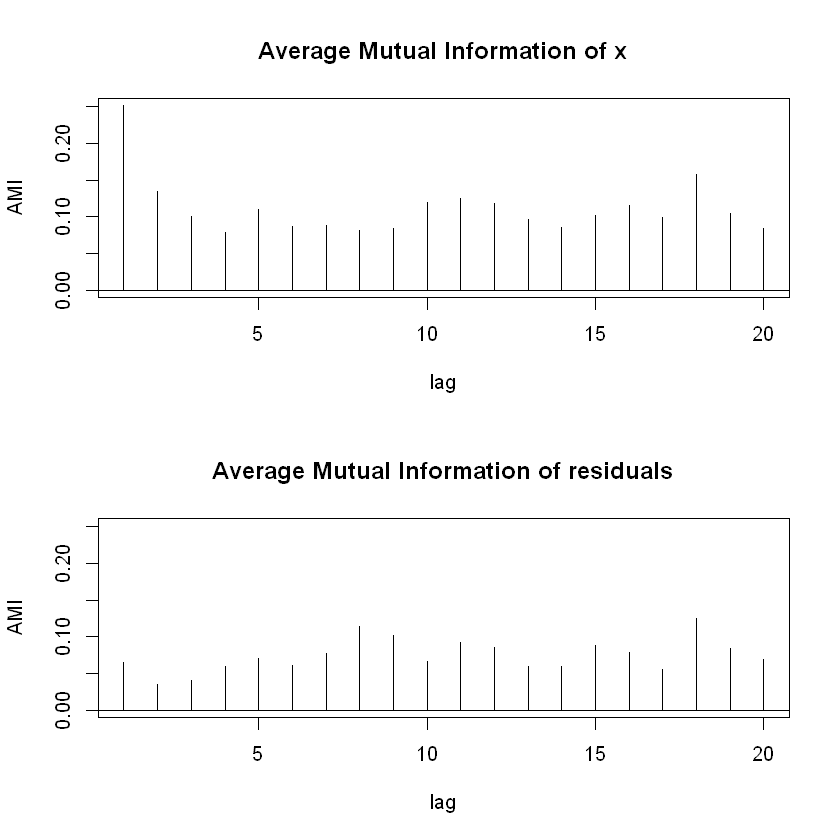

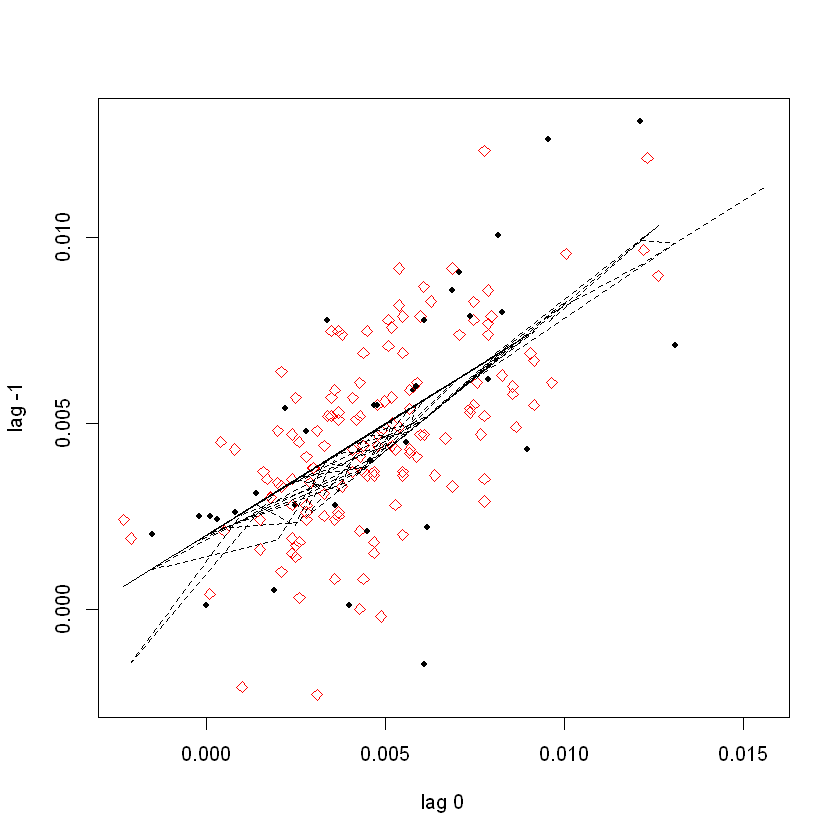

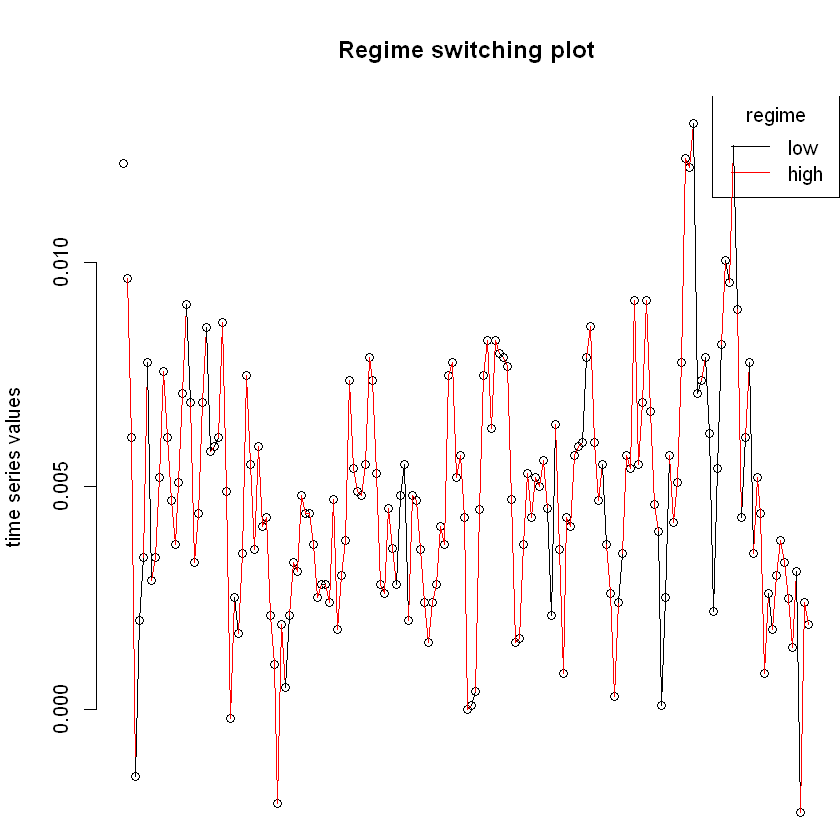

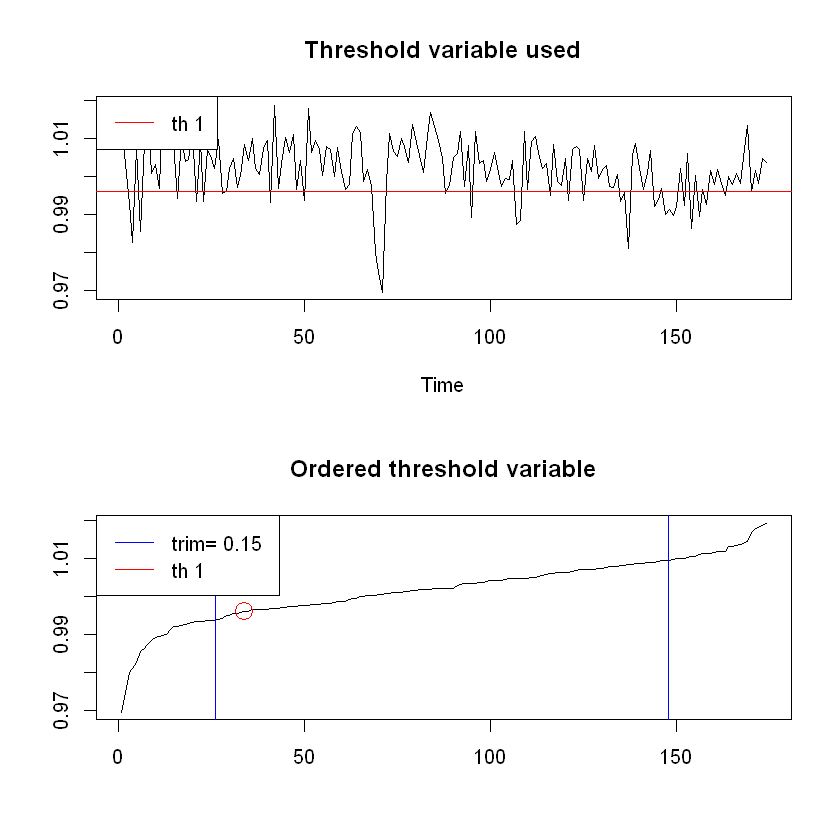

In [320]:
# estima modelo com variavel limiar externa (crescimento mes IBCBRD)
x=diff(log(IPCA))
gm = IBCBRD/lag(IBCBRD, -1)
a=setar(x, m=1, thVar=gm,include = "const", model="TAR", nthresh=1,trim=0.15)
summary(a)
plot(a)

Nota-se que no segundo caso, a transição entre os regimes é menos frequente, e mais crível.

**Repita o exercício acima para o hiato do produto (do IBCBRD), estimado a partir do filtro HP.**

In [321]:
library(mFilter)
lprod_hp = hpfilter(IBCBRD,freq=14400,type=c("lambda"),drift=TRUE)
hiato = lprod_hp$cycle

In [322]:
x=hiato
setarTest(x, m=1, thDelay = 0, nboot=100, trim=0.1,test="1vs")

Test of linearity against setar(2) and setar(3)

         Test Pval
1vs2 2.219526 0.99
1vs3 5.948322 0.98


Non linear autoregressive model

SETAR model ( 2 regimes)
Coefficients:
Low regime:
  const.L    phiL.1 
0.2612451 0.9817080 

High regime:
    const.H      phiH.1 
-0.06082212  0.93708365 

Threshold:
-Variable: Z(t) = + (1) X(t)
-Value: -0.9581
Proportion of points in low regime: 33.14% 	 High regime: 66.86% 

Residuals:
     Min       1Q   Median       3Q      Max 
-4.45655 -0.56867  0.10234  0.64269  2.07957 

Fit:
residuals variance = 0.8779,  AIC = -13, MAPE = 129.2%

Coefficient(s):

         Estimate  Std. Error  t value Pr(>|t|)    
const.L  0.261245    0.237007   1.1023   0.2719    
phiL.1   0.981708    0.080855  12.1416   <2e-16 ***
const.H -0.060822    0.122338  -0.4972   0.6197    
phiH.1   0.937084    0.070506  13.2908   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold
Variable: Z(t) = + (1) X(t) 

Value: -0.9581

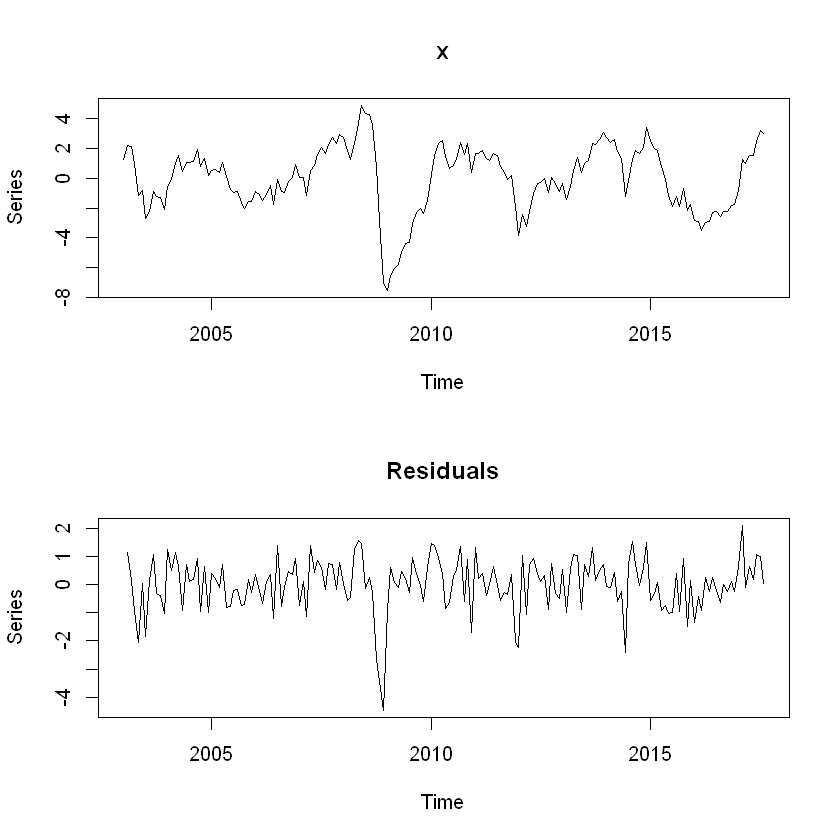

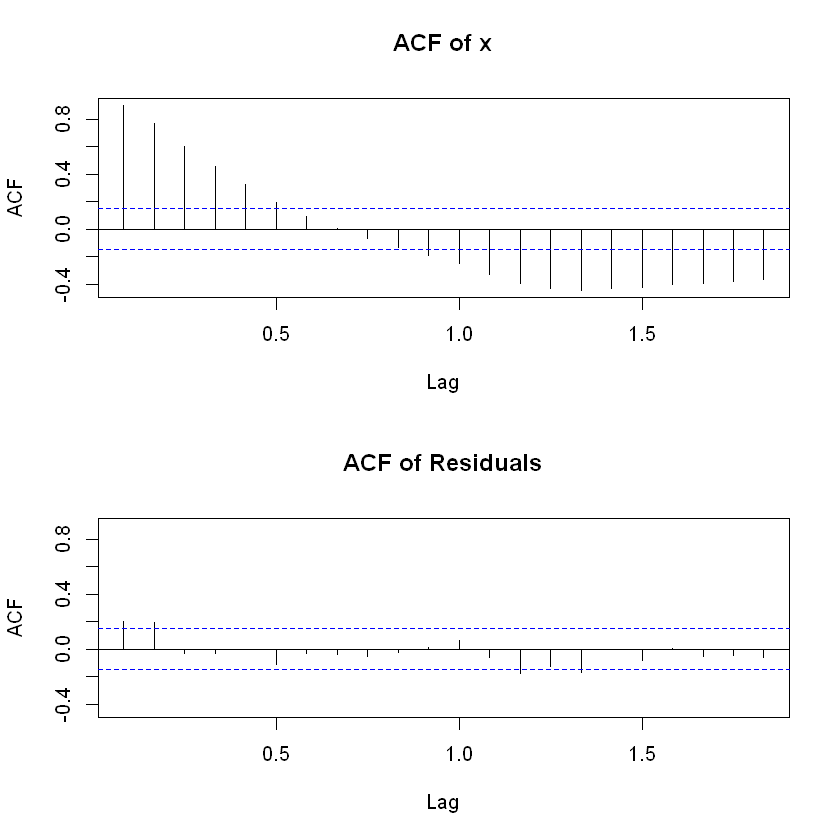

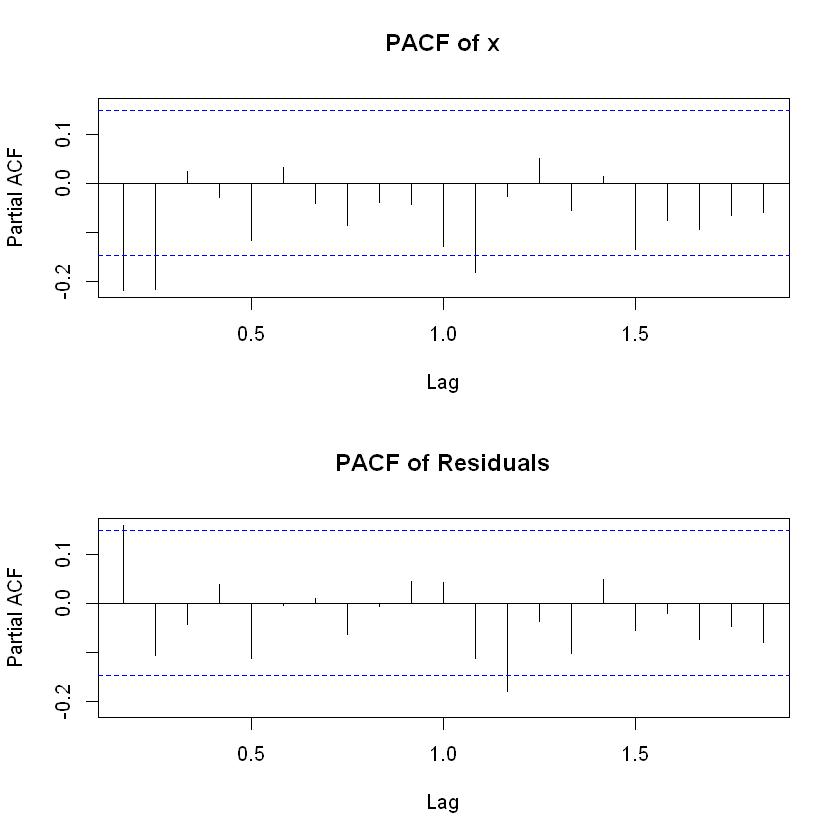

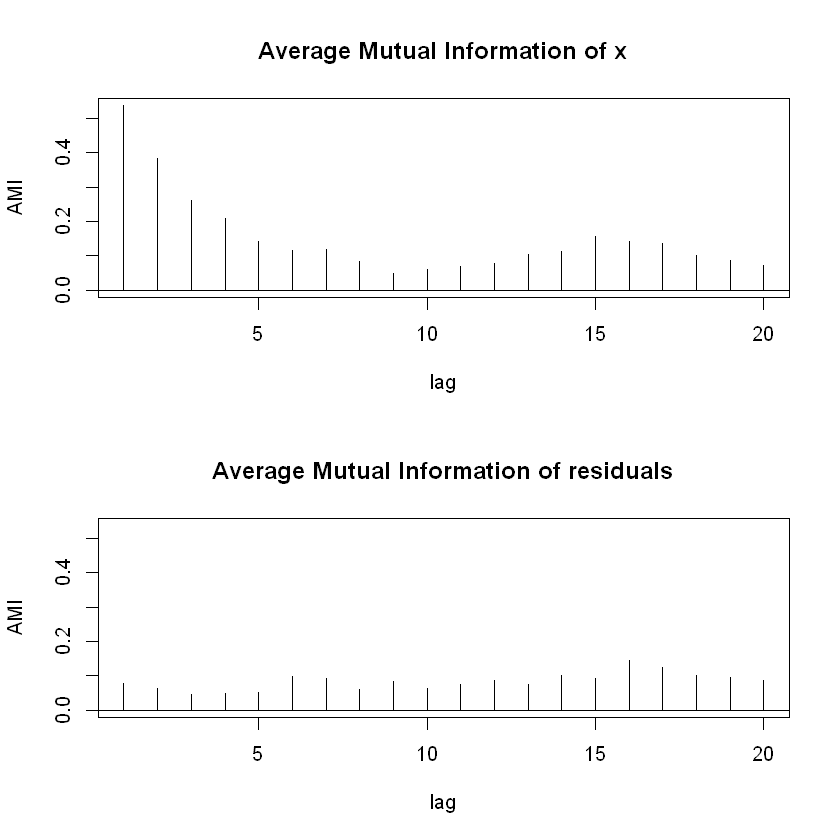

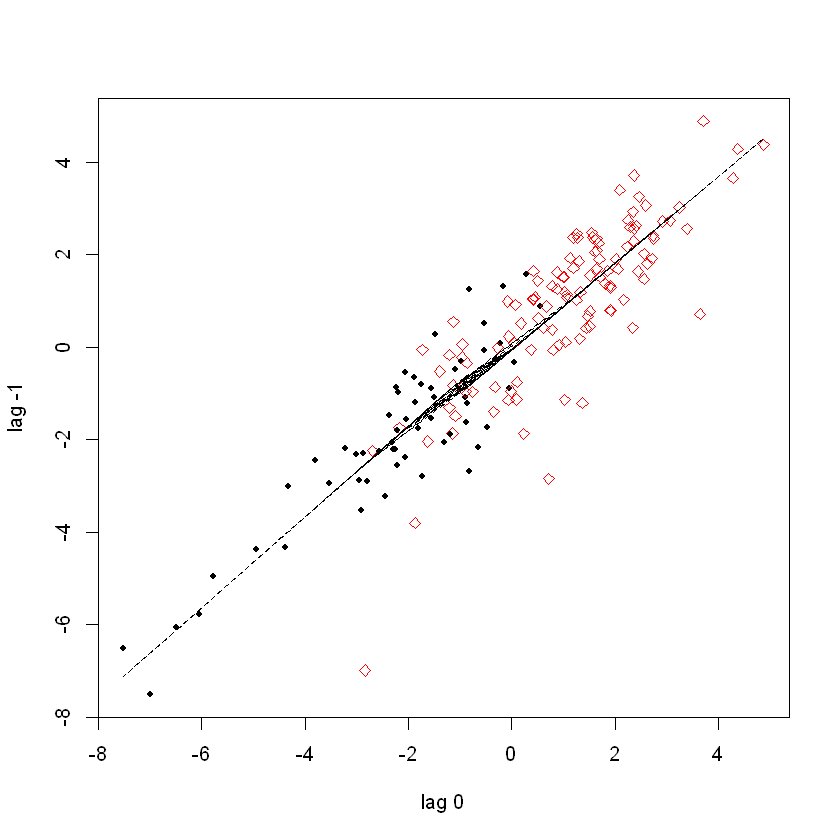

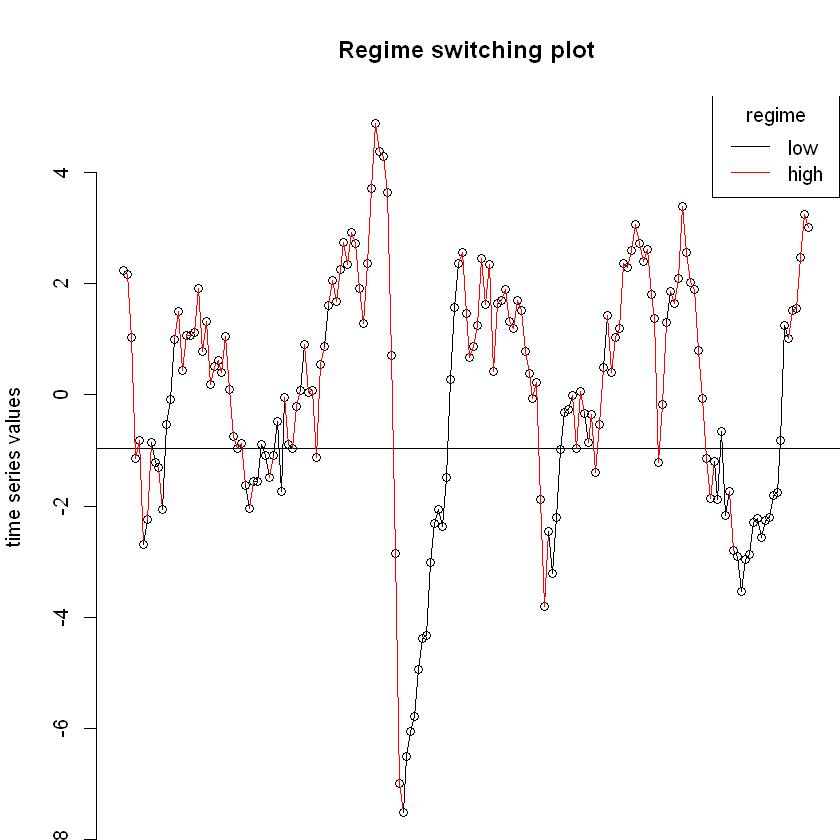

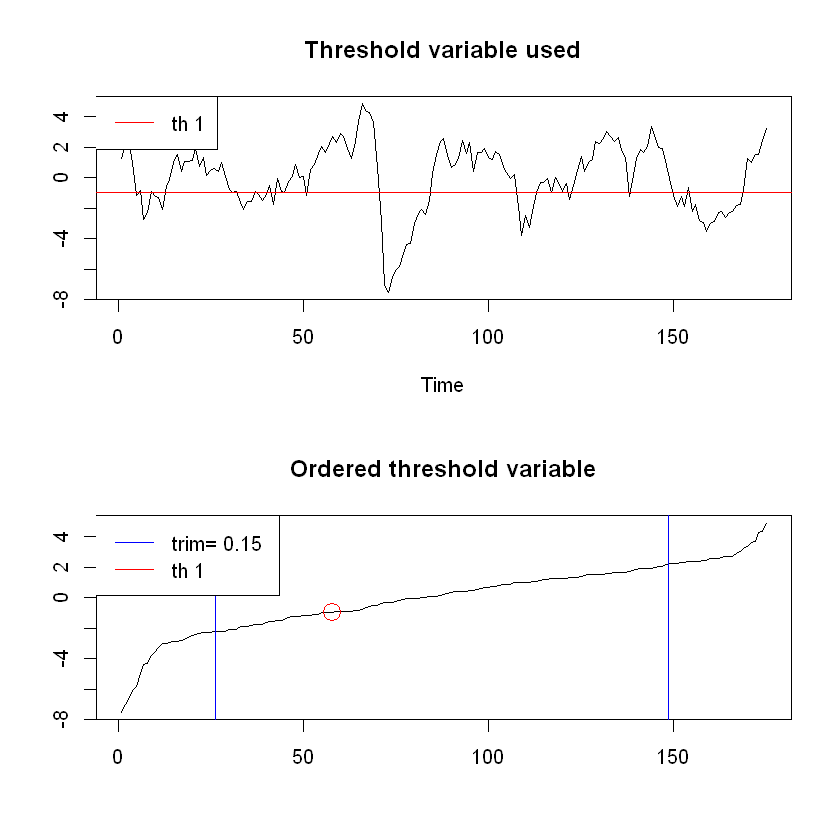

In [323]:
model = setar(x, m=1, thDelay=0, include = "const", model="TAR", nthresh=1, trim=0.15)
summary(model)
plot(model)

## Parte 2

In [324]:
library('glmnet')
library('HDeconometrics')
library('xts')

**4 . Instale o pacote HDeconometrics e acesse os dados usados em Garcia et al. (2017), que iniciam em 2003:1 e vão até 2015:12. Estime uma regressão linear da taxa de inflação (primeira variável do banco de dados) na sua defasagem e nas defasagens das variáveis V2-V30 (diversas variáveis macroeconômicas) até 2013:12 (deixando 24 observações para o período de “teste”). Use o modelo para realizar previsões da inflação 1 passo e 3 passos à frente até o final da amostra, atualizando a amostra de estimação em cada passo.**

In [325]:
df = read.csv('amostra_2311.csv', sep = ";", dec=",")

**5 . Realize uma análise de componentes principais das variáveis V2-V30. Quantos componentes principais parecem suficientes para explicar a maior parte da variância conjunta dessas séries?**

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6    PC7
Standard deviation     3.6645 1.23451 1.20644 1.13956 1.11948 1.08456 1.0316
Proportion of Variance 0.4631 0.05255 0.05019 0.04478 0.04322 0.04056 0.0367
Cumulative Proportion  0.4631 0.51560 0.56579 0.61057 0.65379 0.69435 0.7310
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.02000 0.98325 0.95688 0.95478 0.91476 0.84430 0.82241
Proportion of Variance 0.03588 0.03334 0.03157 0.03143 0.02885 0.02458 0.02332
Cumulative Proportion  0.76692 0.80026 0.83183 0.86326 0.89212 0.91670 0.94002
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.77961 0.71258 0.61560 0.42441 0.20099 0.10262 0.08586
Proportion of Variance 0.02096 0.01751 0.01307 0.00621 0.00139 0.00036 0.00025
Cumulative Proportion  0.96098 0.97849 0.99156 0.99777 0.99916 0.99952 0.99978
                          PC22    

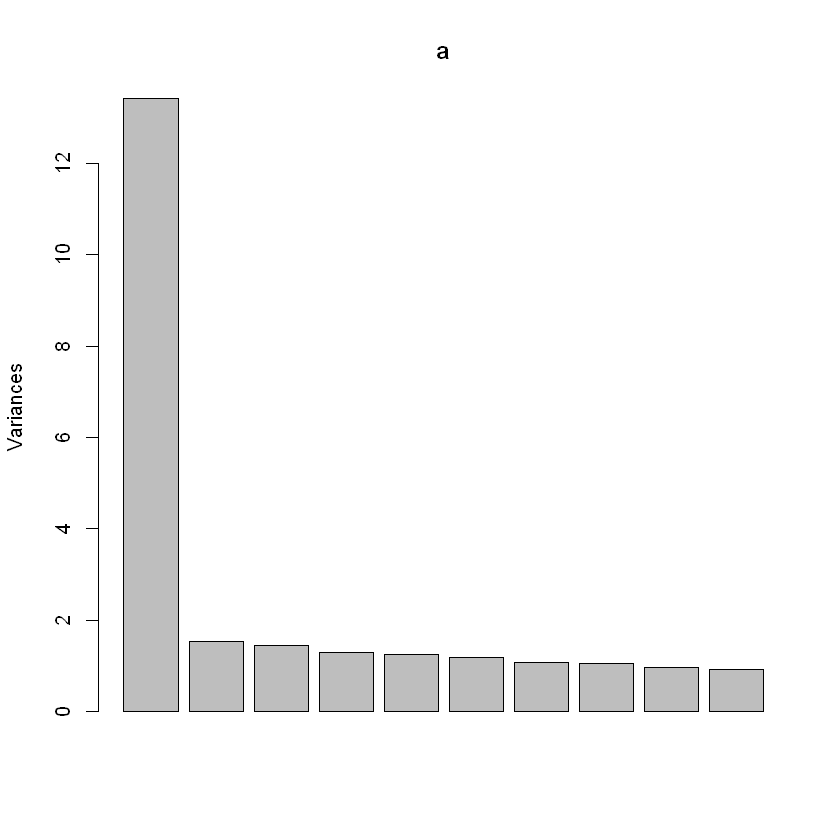

In [326]:
### Componentes principais
z=df[,2:30]
a=prcomp(z,scale. = T)
summary(a)
plot(a)

17 componentes explicam 99% da variância.

**6 . Estime uma regressão linear da taxa de inflação nos componentes principais estimados no item anterior até 2013:12. Use o modelo para realizar previsões da inflação 1 passo e 3 passos à frente até o final da amostra, atualizando a amostra de estimação em cada passo.**

In [336]:
#escolhe primeiros 17 componentes
i = 0
p1 = list()
p3 = list()
pc=(a$x[,1:17])
dados = data.frame(y=IPCA, pc=I(pc[0:176,]))
for (i in 0:41){   
    dados.in=dados[1:(132+i),]
    dados.out=dados[-(1:(132+i)),]
    b=lm(y~pc,data=dados)
    #summary(b)
    p1[i] = predict(b,data.frame(dados.out[1,]))
    p3[i] = predict(b,data.frame(dados.out[3,]))
    }

**7 . Agora estime a regressão da inflação nas variáveis V2-V30 usando: (i) ridge; (ii) LASSO. Compare com os resultados das previsões dos modelos anteriores**

In [349]:
#-----------
# ridge
#-----------
lasso2=glmnet(dados$y,dados$pc,alpha = 0)
plot(lasso2,label=T)
print(lasso2)
coef(lasso2,s=0.1)
cv.fit2=cv.glmnet(dados$y,dados$pc,alpha = 0)
plot(cv.fit2)
coef(cv.fit2,s="lambda.min")

# == Forecasting == ##
pred.lasso=predict(lasso,newdata=x.out)
plot(y.out, type="l")
lines(pred.lasso, col=2)

ERROR: Error in if (is.null(np) | (np[2] <= 1)) stop("x should be a matrix with 2 or more columns"): argumento tem comprimento zero
